In [1]:
import xarray as xr
#import rioxarray as rxr
import xesmf as xe
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import matplotlib.colors
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy.stats import chi2
from numba import njit,prange
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.05  # previous pdf hatch linewidth
from matplotlib.dates import DateFormatter

from pyproj import CRS,Transformer,Proj

import sys
sys.path.insert(1, '/home/castelli/Notebooks/PhD/utils') # to include my util file in previous directory
import utils as u
u.check_python_version()

3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]


In [2]:
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-EC-Earth3/MARgrid_EUe.nc')

imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
lon = np.array(ds.LON[jmin:jmax,imin:imax])
lat = np.array(ds.LAT[jmin:jmax,imin:imax])
H = np.array(ds.SH[jmin:jmax,imin:imax])
nlat,nlon = 91, 139

normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True,
                 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
big_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True,
              'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[41.,50],'lonlim':[0.,20.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2,
                    'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

veg_mar = ['No Veg.', # 0
           'Crops Low', # 1
           'Crops Medium', # 2
           'Crops High', # 3
           'Grass low', # 4
           'Grass Medium', # 5
           'Grass High', # 6
           'Broadleaf Low', # 7
           'Broadleaf Medium', # 8
           'Broadleaf High', # 9
           'Needle Low', # 10
           'Needle Medium', # 11
           'Needle High', # 12
           'City'] # 13

### MAR-ERA5 : v3.10 vs v3.14 EUe (+15% humidity NESTOR, +0% marmagic) vs v3.14 EUo (+7.5% humidity NESTOR, +5% marmagic)

#### September 2014

In [3]:
ds_310 = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.TTz.2014.nc').sel(ztqlev=2.0,time=slice('2014-09-01','2014-09-30')).TTz

In [4]:
ds_314EUe = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.09.01-30.nc').TTz.sel(ztqlev=2.0)

In [5]:
ds_314EUo = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.09.01-30.nc').TTz.sel(ztqlev=2.0)

In [13]:
ds_314EUo

<xarray.DataArray 'TTz' (time: 30, y: 126, x: 201)>
[759780 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-01T12:00:00 ... 2014-09-30T12:00:00
  * x        (x) float32 -483.0 -476.0 -469.0 -462.0 ... 896.0 903.0 910.0 917.0
  * y        (y) float32 -308.0 -301.0 -294.0 -287.0 ... 546.0 553.0 560.0 567.0
    ztqlev   float32 2.0
Attributes:
    units:          C
    long_name:      Temperature
    standard_name:  Temperature
    actual_range:   [-5.247163 26.931107]

In [6]:
ds_314EUo02 = xr.open_dataset('/bettik/castelli/MARout/EUo/o02/2014/ICE.o02.2014.09.01-30.nc').TTz.sel(ztqlev=2.0)

In [7]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

{'whiskers': [<matplotlib.lines.Line2D at 0x1457d0a941f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1457d0a94880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1457d0c47c40>,
 'medians': [<matplotlib.lines.Line2D at 0x1457d0a94fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1457d0a95330>,
 'means': []}

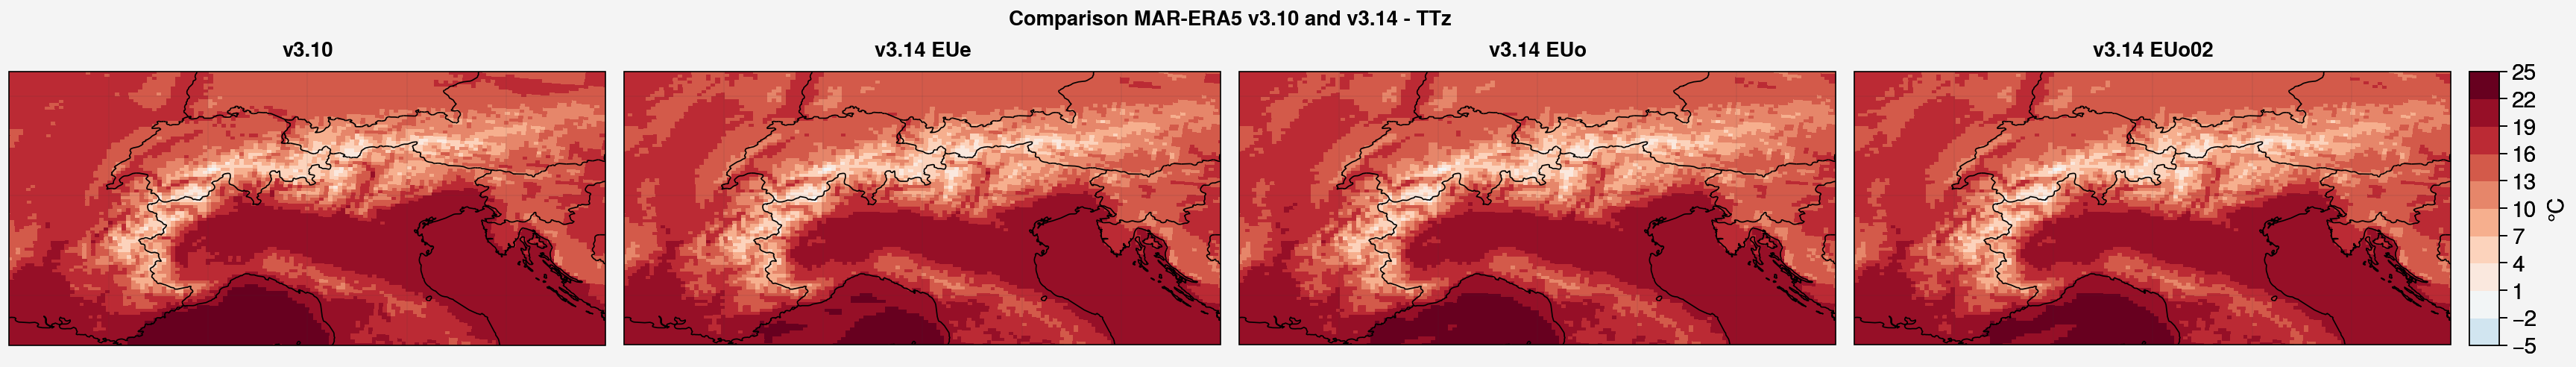

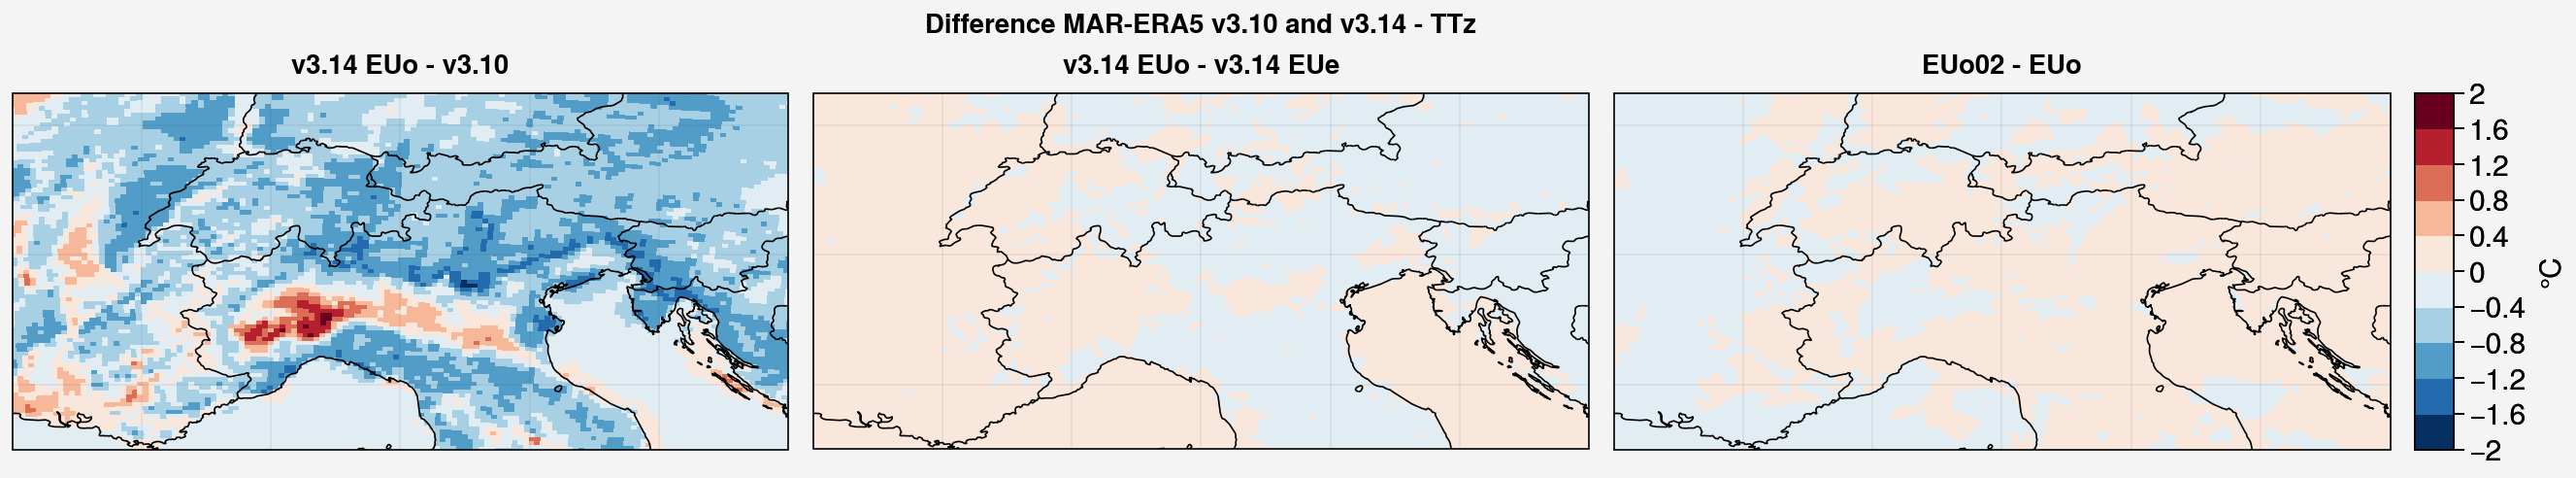

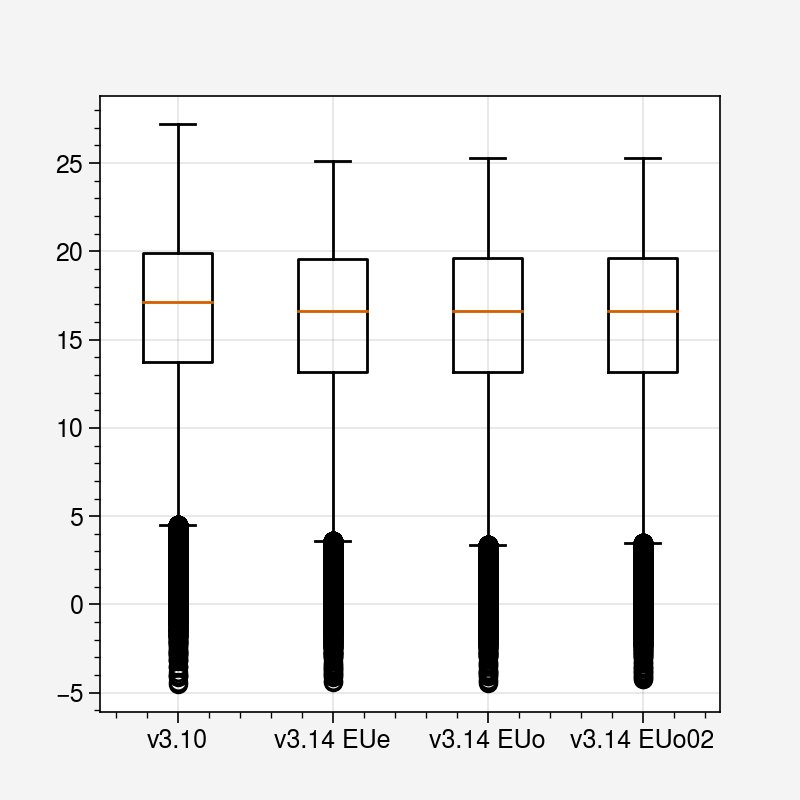

In [8]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=4,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-5,25,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)
m=axs[3].pcolormesh(ds.LON,ds.LAT,ds_314EUo02.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.10','v3.14 EUe','v3.14 EUo','v3.14 EUo02'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-2,2,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo02.mean(dim='time') - ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe','EUo02 - EUo'])

# __________________________________
f,axs = plt.subplots()

ds_314EUe_daily = ds_314EUe.groupby("time.day").mean(dim="time")

axs.boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),ds_314EUo02[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','v3.14 EUo02'])

In [9]:
ds_310_MBrr = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBrr.2014.nc').sel(time=slice('2014-09-01','2014-09-30')).MBrr
ds_310_MBsf = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBsf.2014.nc').sel(time=slice('2014-09-01','2014-09-30')).MBsf

ds_310 = ds_310_MBrr + ds_310_MBsf

In [10]:
ds_314EUe_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.09.01-30.nc').MBrr
ds_314EUe_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.09.01-30.nc').MBsf

ds_314EUe = ds_314EUe_MBrr + ds_314EUe_MBsf

In [11]:
ds_314EUo_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.09.01-30.nc').MBrr
ds_314EUo_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.09.01-30.nc').MBsf

ds_314EUo = ds_314EUo_MBrr + ds_314EUo_MBsf

In [12]:
ds_314EUo02_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUo/o02/2014/ICE.o02.2014.09.01-30.nc').MBrr
ds_314EUo02_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUo/o02/2014/ICE.o02.2014.09.01-30.nc').MBsf

ds_314EUo02 = ds_314EUo02_MBrr + ds_314EUo02_MBsf

In [13]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

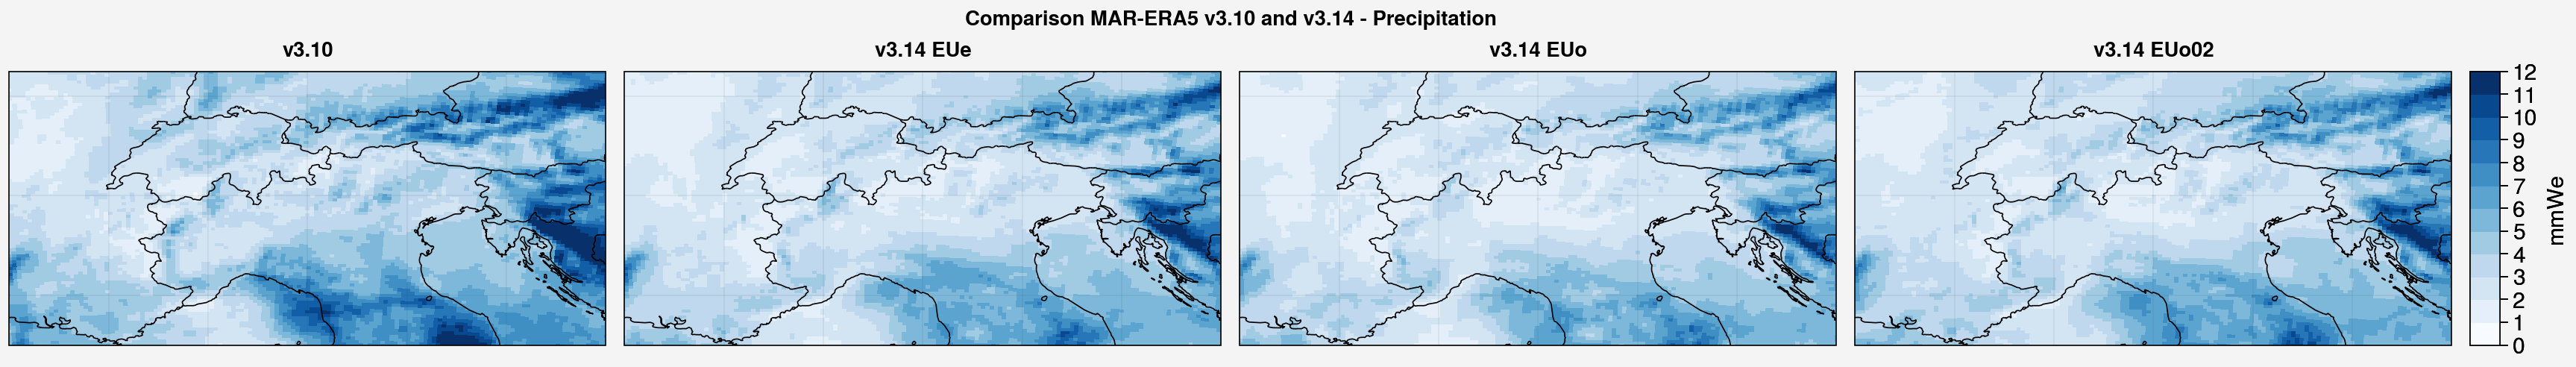

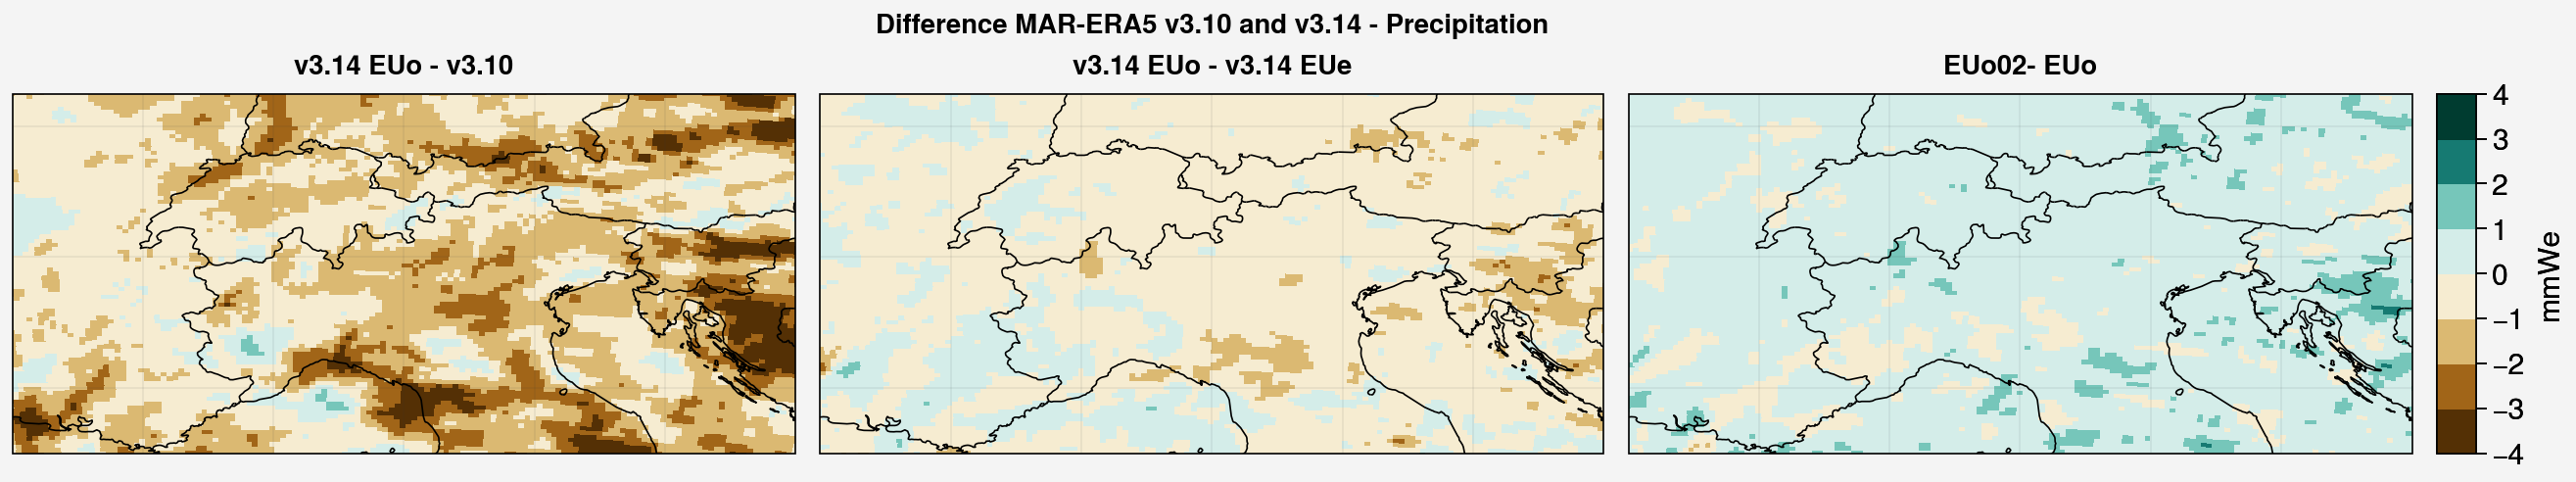

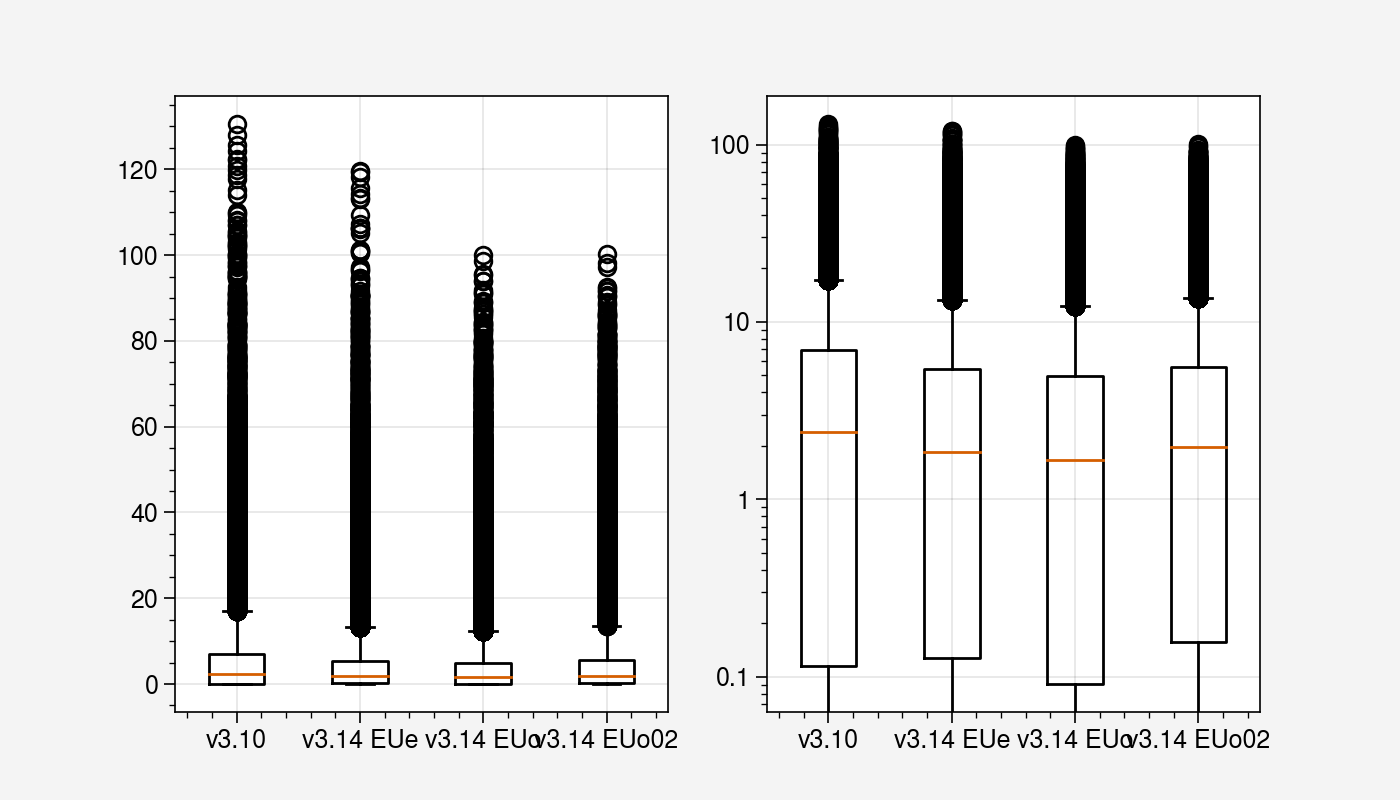

In [14]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=4,nrows=1)

ds_314EUe_daily = ds_314EUe.groupby("time.day").sum(dim="time")

colmap = 'Blues'
lvls = np.linspace(0,12,13)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)
m=axs[3].pcolormesh(ds.LON,ds.LAT,ds_314EUo02.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.10','v3.14 EUe','v3.14 EUo','v3.14 EUo02'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'BrBG'
lvls = np.linspace(-4.,4.,9)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo02.mean(dim='time') - ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe','EUo02- EUo'])

# __________________________________
f,axs = plt.subplots(ncols=2)


axs[0].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),ds_314EUo02[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','v3.14 EUo02'])

axs[1].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),ds_314EUo02[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','v3.14 EUo02'])
axs[1].set_yscale('log')
f.set_figwidth(7)


In [49]:
ds_310 = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.CC.2014.nc').sel(time=slice('2014-09-01','2014-09-30')).CC

In [50]:
ds_314EUe = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.09.01-30.nc').CC

In [51]:
ds_314EUo = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.09.01-30.nc').CC

In [52]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

{'whiskers': [<matplotlib.lines.Line2D at 0x14ff3ce74b80>,
 'caps': [<matplotlib.lines.Line2D at 0x14ff3c8cfc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ff3ce75ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x14ff3c8cc7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14ff3c8cd480>,
 'means': []}

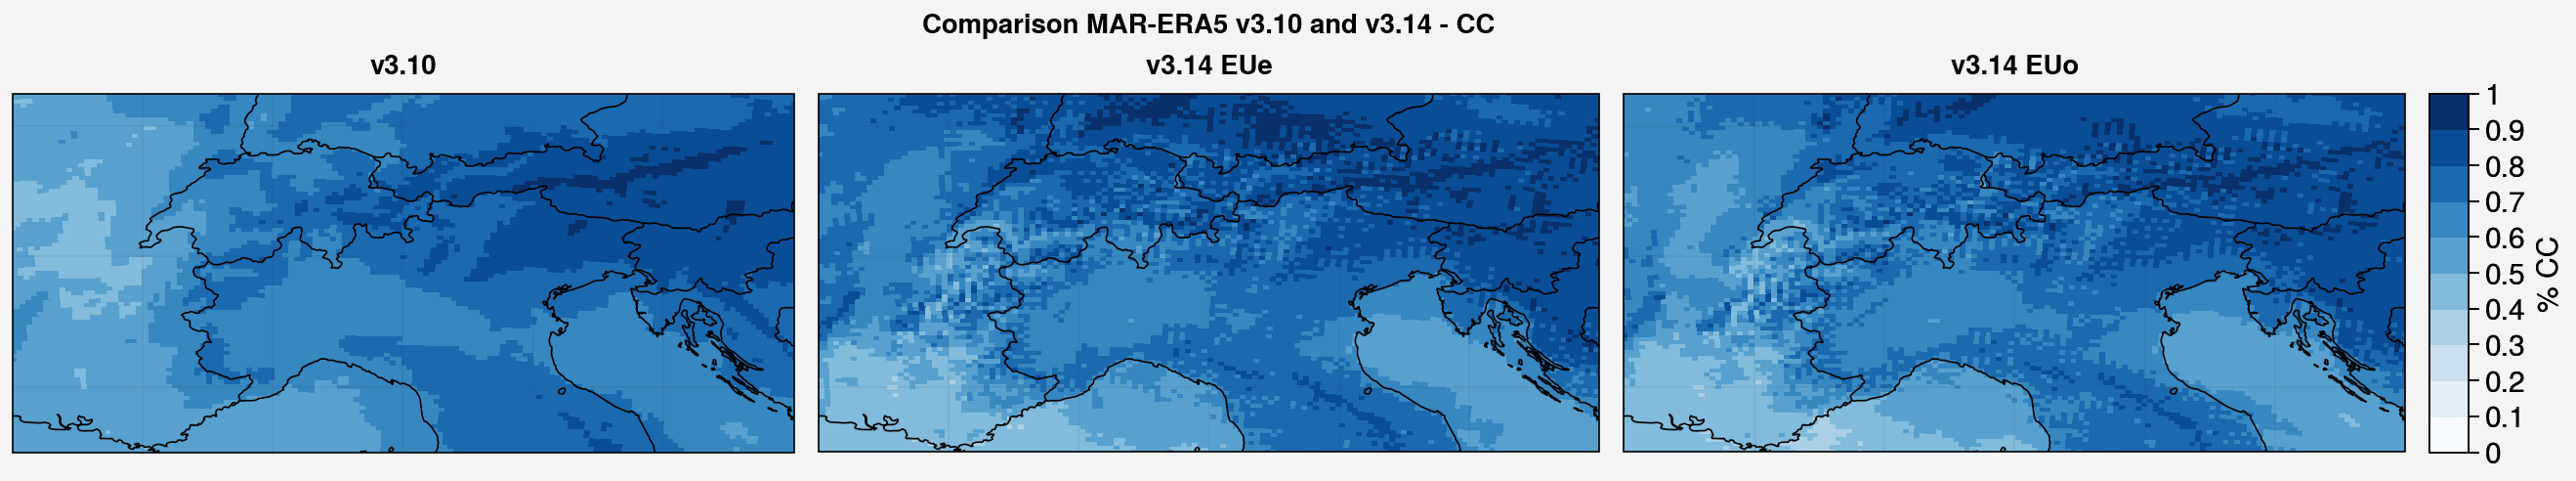

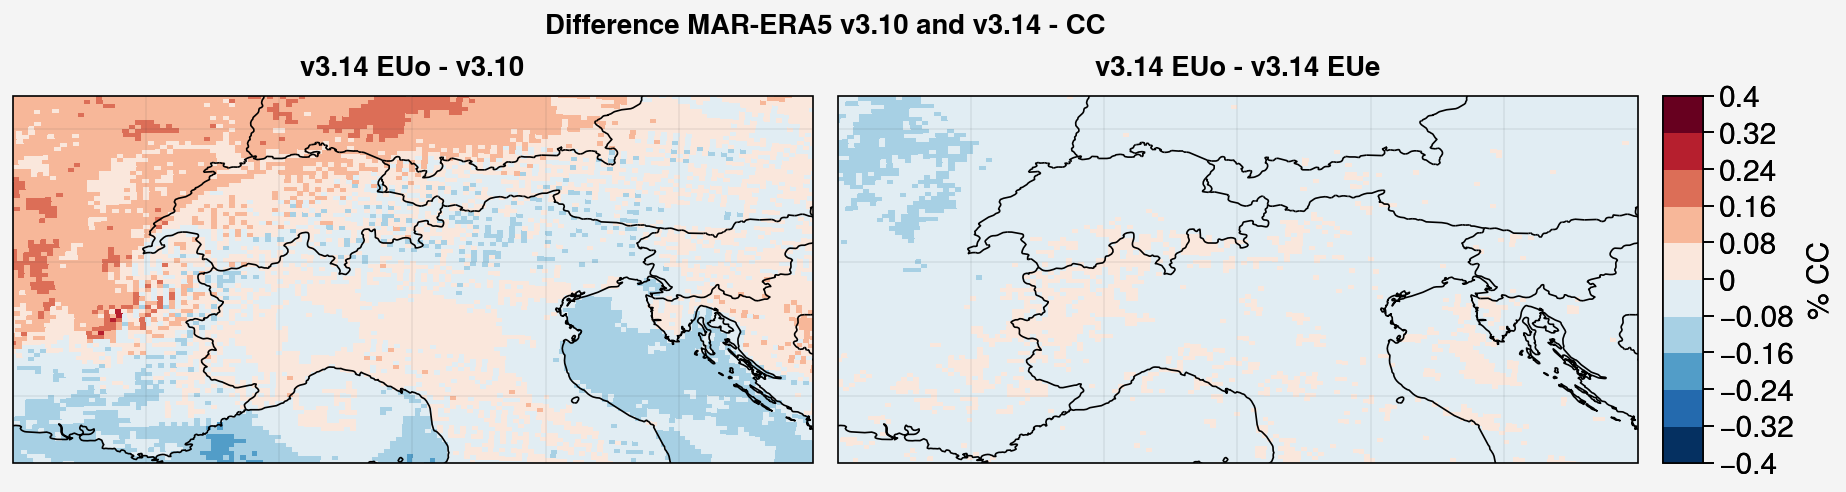

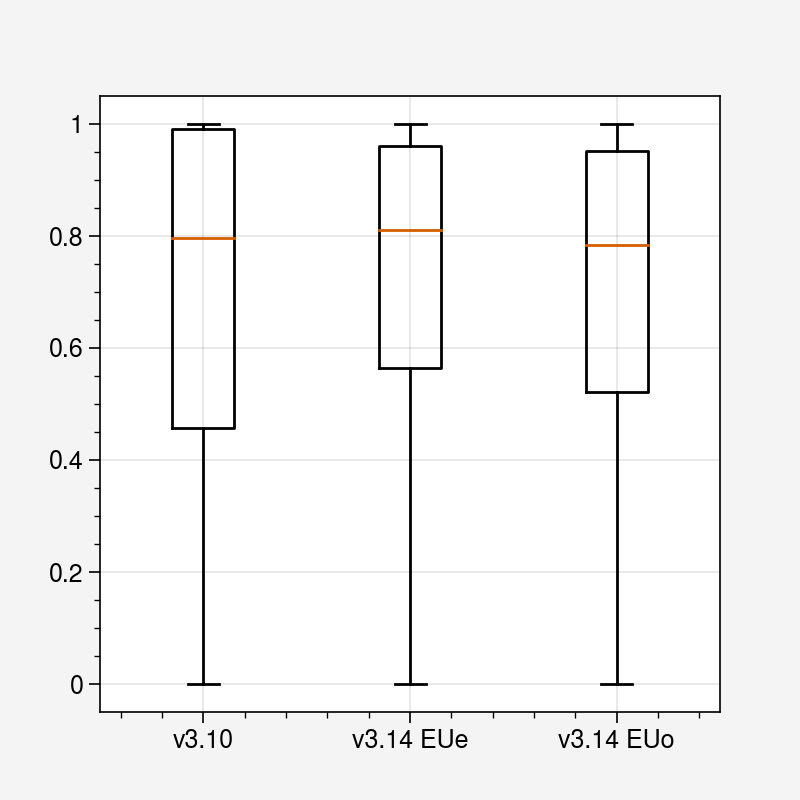

In [54]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'Blues'
lvls = np.linspace(0,1,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '% CC',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - CC',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-0.4,0.4,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '% CC',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - CC',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots()

ds_314EUe_daily = ds_314EUe.groupby("time.day").mean(dim="time")

axs.boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

#### October 2014

In [55]:
ds_310 = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.TTz.2014.nc').sel(ztqlev=2.0,time=slice('2014-10-01','2014-10-31')).TTz

ds_314EUe = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.10.01-31.nc').TTz.sel(ztqlev=2.0)

ds_314EUo = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.10.01-31.nc').TTz.sel(ztqlev=2.0)

In [56]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

{'whiskers': [<matplotlib.lines.Line2D at 0x14ff40555e10>,
 'caps': [<matplotlib.lines.Line2D at 0x14ff40556170>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ff3f6a3dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x14ff40555d20>,
 'fliers': [<matplotlib.lines.Line2D at 0x14ff405544f0>,
 'means': []}

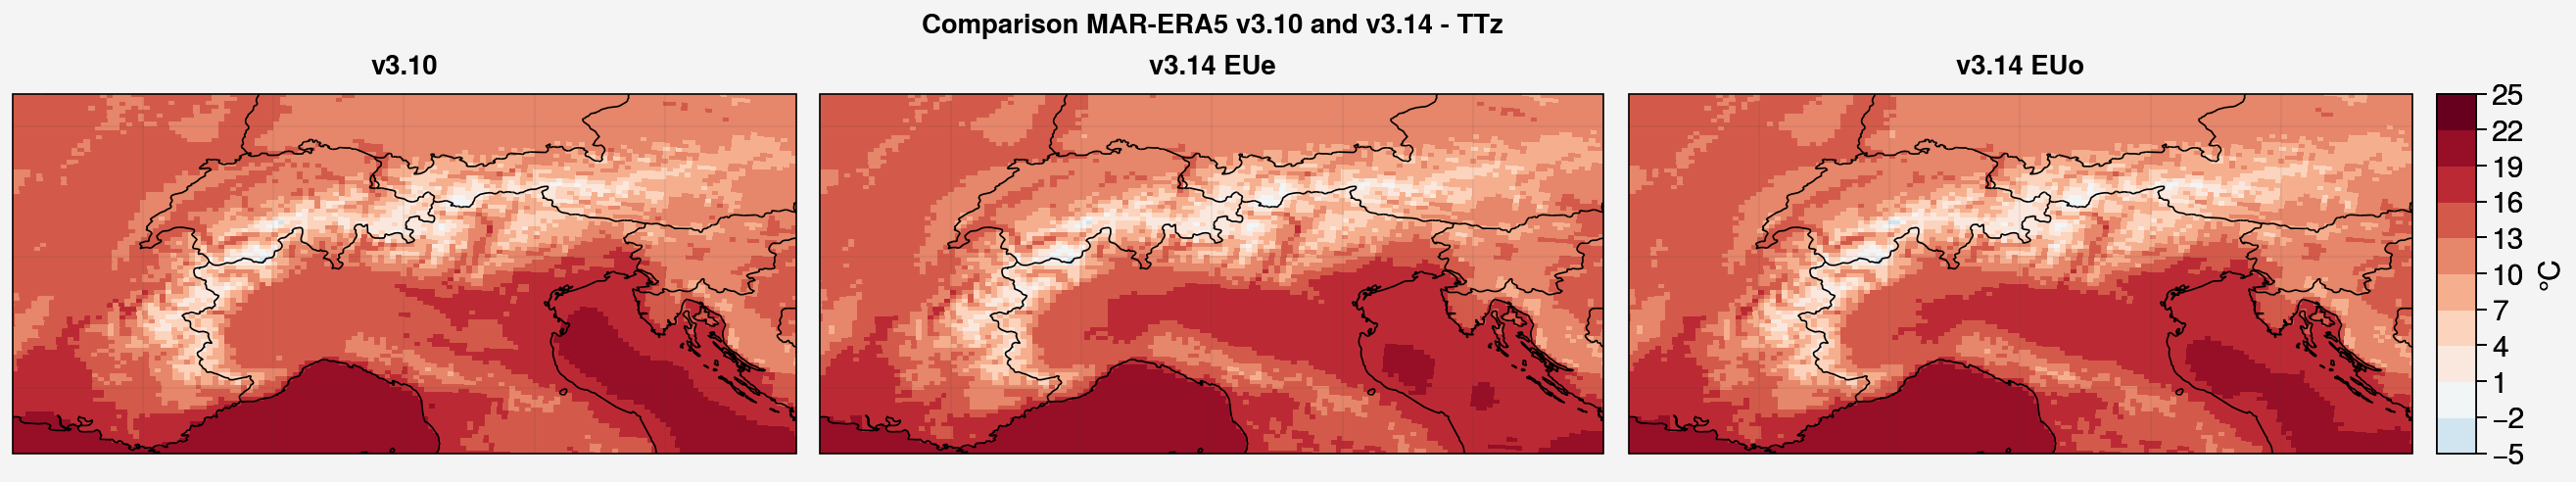

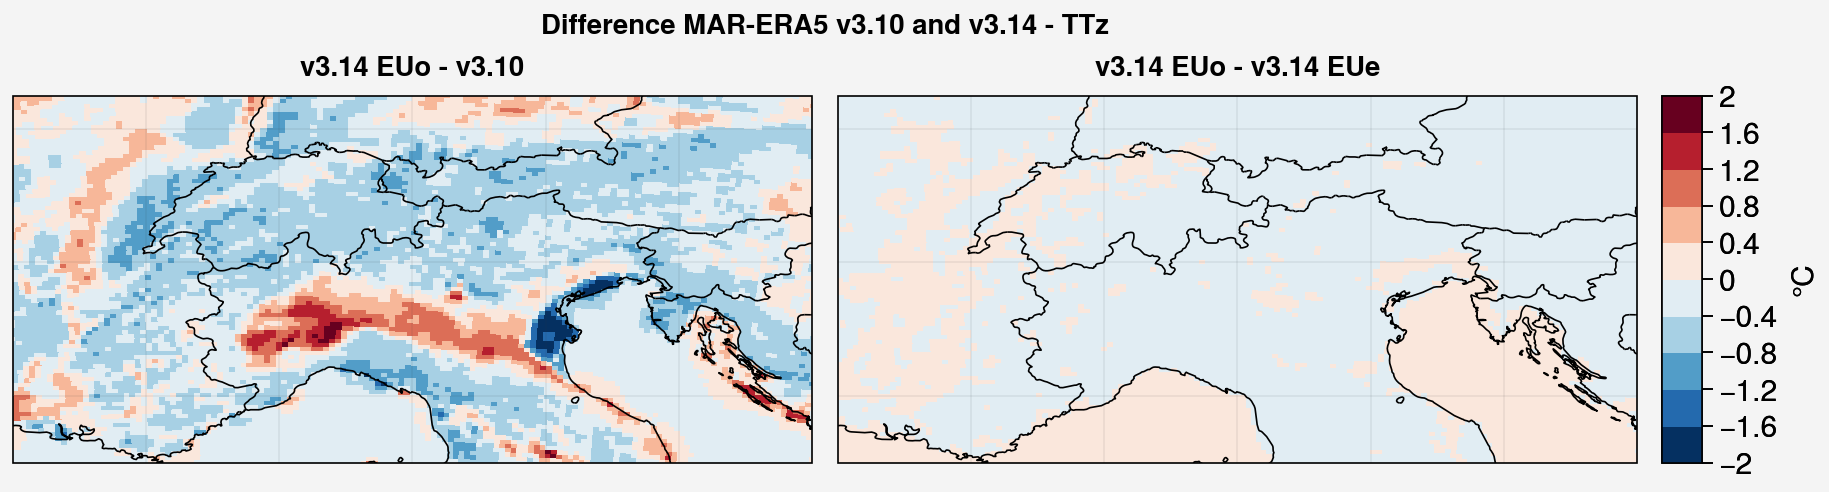

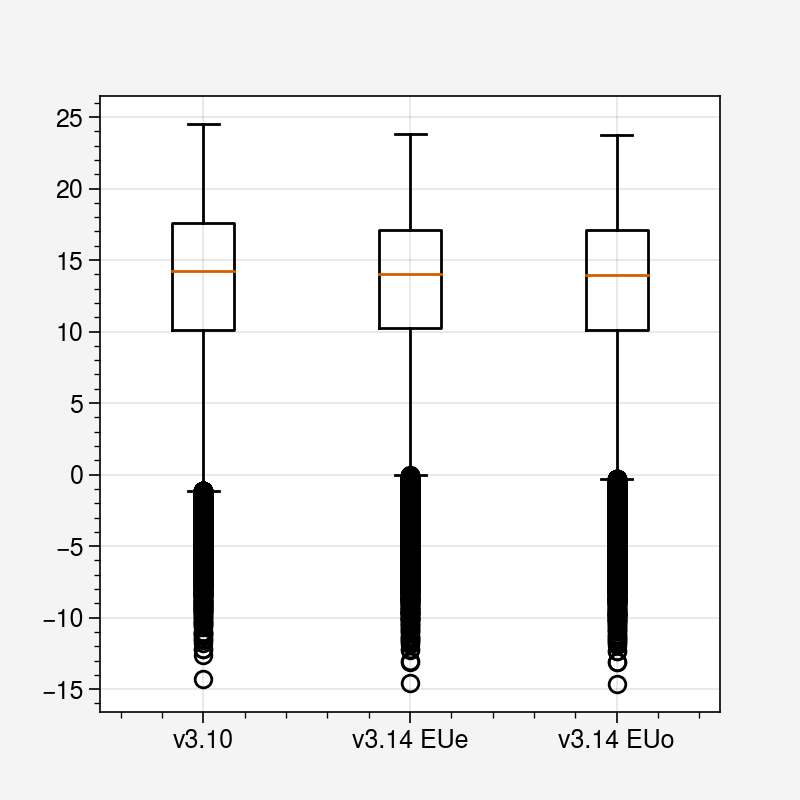

In [57]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-5,25,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-2,2,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots()

ds_314EUe_daily = ds_314EUe.groupby("time.day").mean(dim="time")

axs.boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

In [102]:
ds_310_MBrr = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBrr.2014.nc').sel(time=slice('2014-10-01','2014-10-31')).MBrr
ds_310_MBsf = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBsf.2014.nc').sel(time=slice('2014-10-01','2014-10-31')).MBsf

ds_310 = ds_310_MBrr + ds_310_MBsf

In [103]:
ds_314EUe_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.10.01-31.nc').MBrr
ds_314EUe_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.10.01-31.nc').MBsf

ds_314EUe = ds_314EUe_MBrr + ds_314EUe_MBsf

In [104]:
ds_314EUo_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.10.01-31.nc').MBrr
ds_314EUo_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.10.01-31.nc').MBsf

ds_314EUo = ds_314EUo_MBrr + ds_314EUo_MBsf

In [105]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

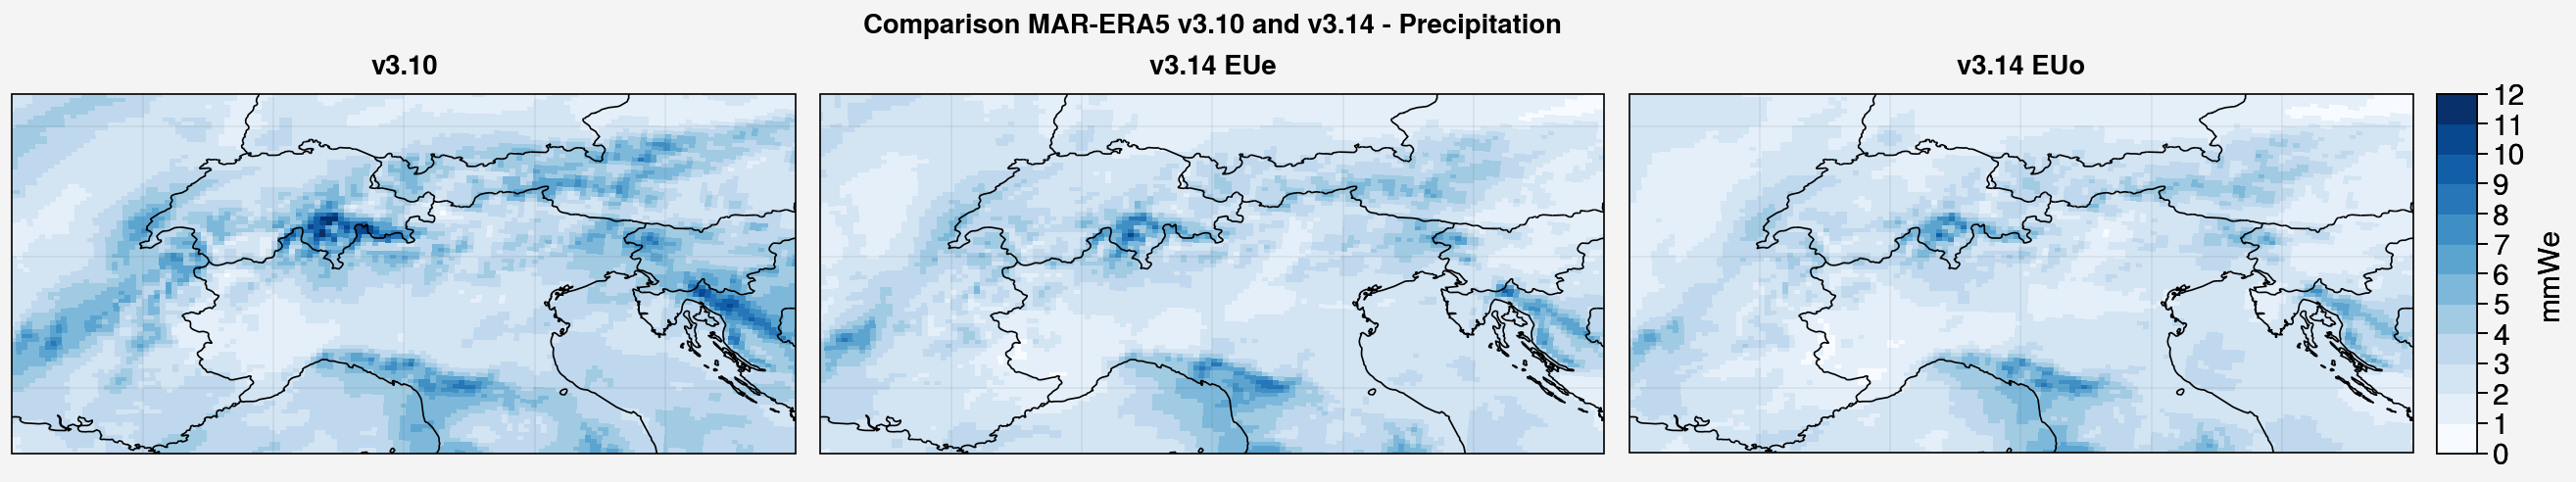

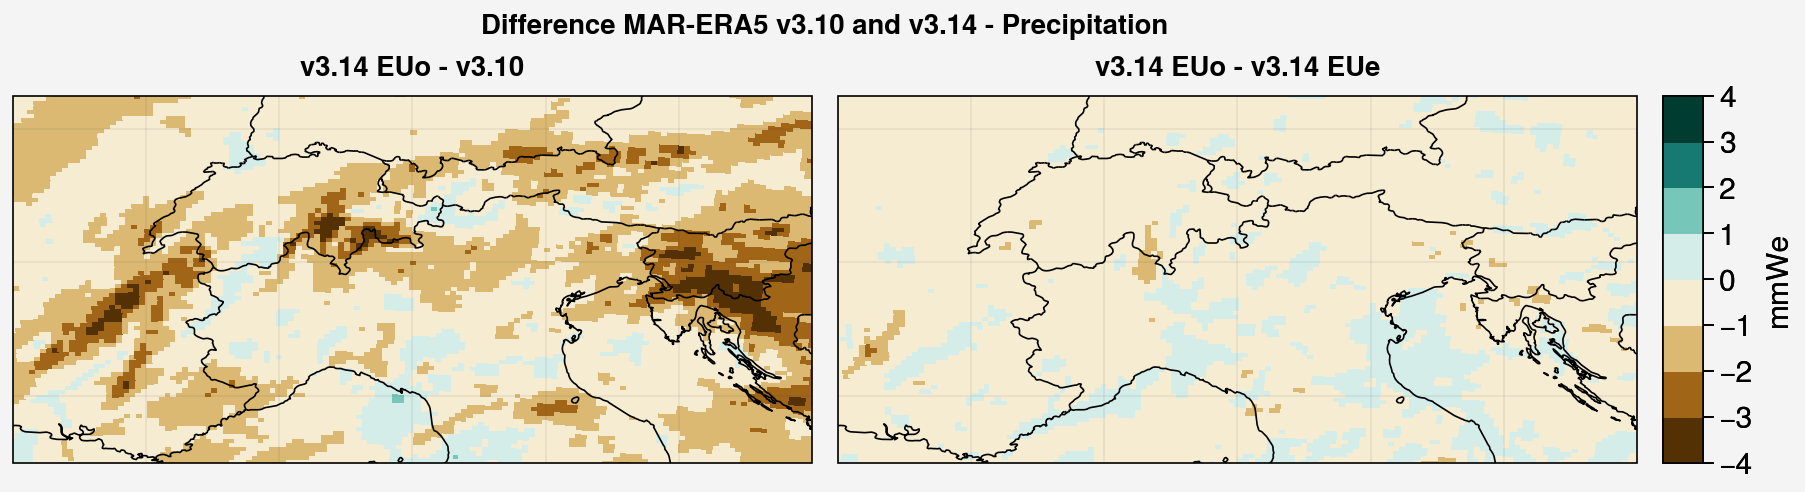

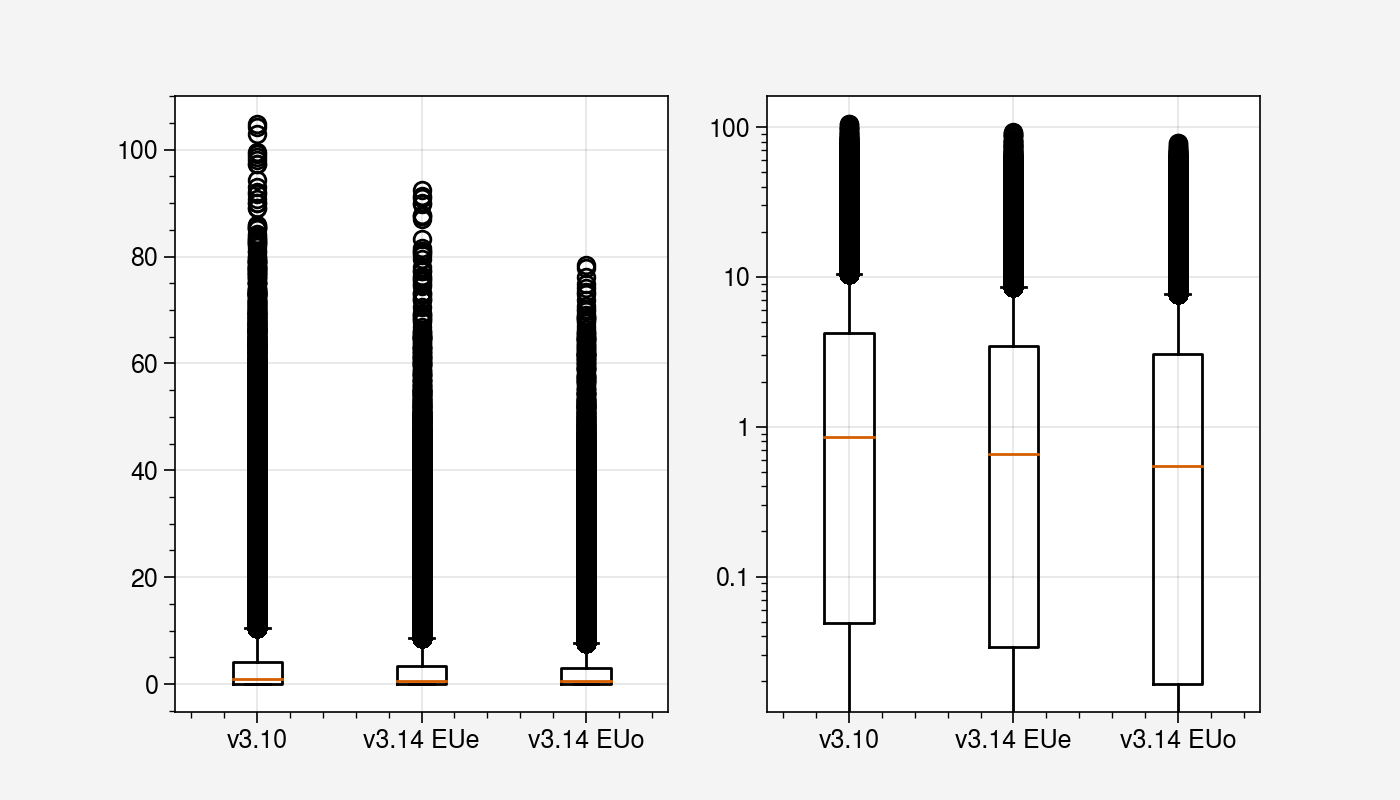

In [77]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

ds_314EUe_daily = ds_314EUe.groupby("time.day").sum(dim="time")

colmap = 'Blues'
lvls = np.linspace(0,12,13)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'BrBG'
lvls = np.linspace(-4,4,9)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots(ncols=2)


axs[0].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

axs[1].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])
axs[1].set_yscale('log')
f.set_figwidth(7)


In [101]:
ds_APGD2006 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2006.nc').sel(time=slice('2006-10-01','2006-10-31')).PRECIPITATION
ds_APGD2007 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2007.nc').sel(time=slice('2007-10-01','2007-10-31')).PRECIPITATION
ds_APGD2008 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2008.nc').sel(time=slice('2008-10-01','2008-10-31')).PRECIPITATION

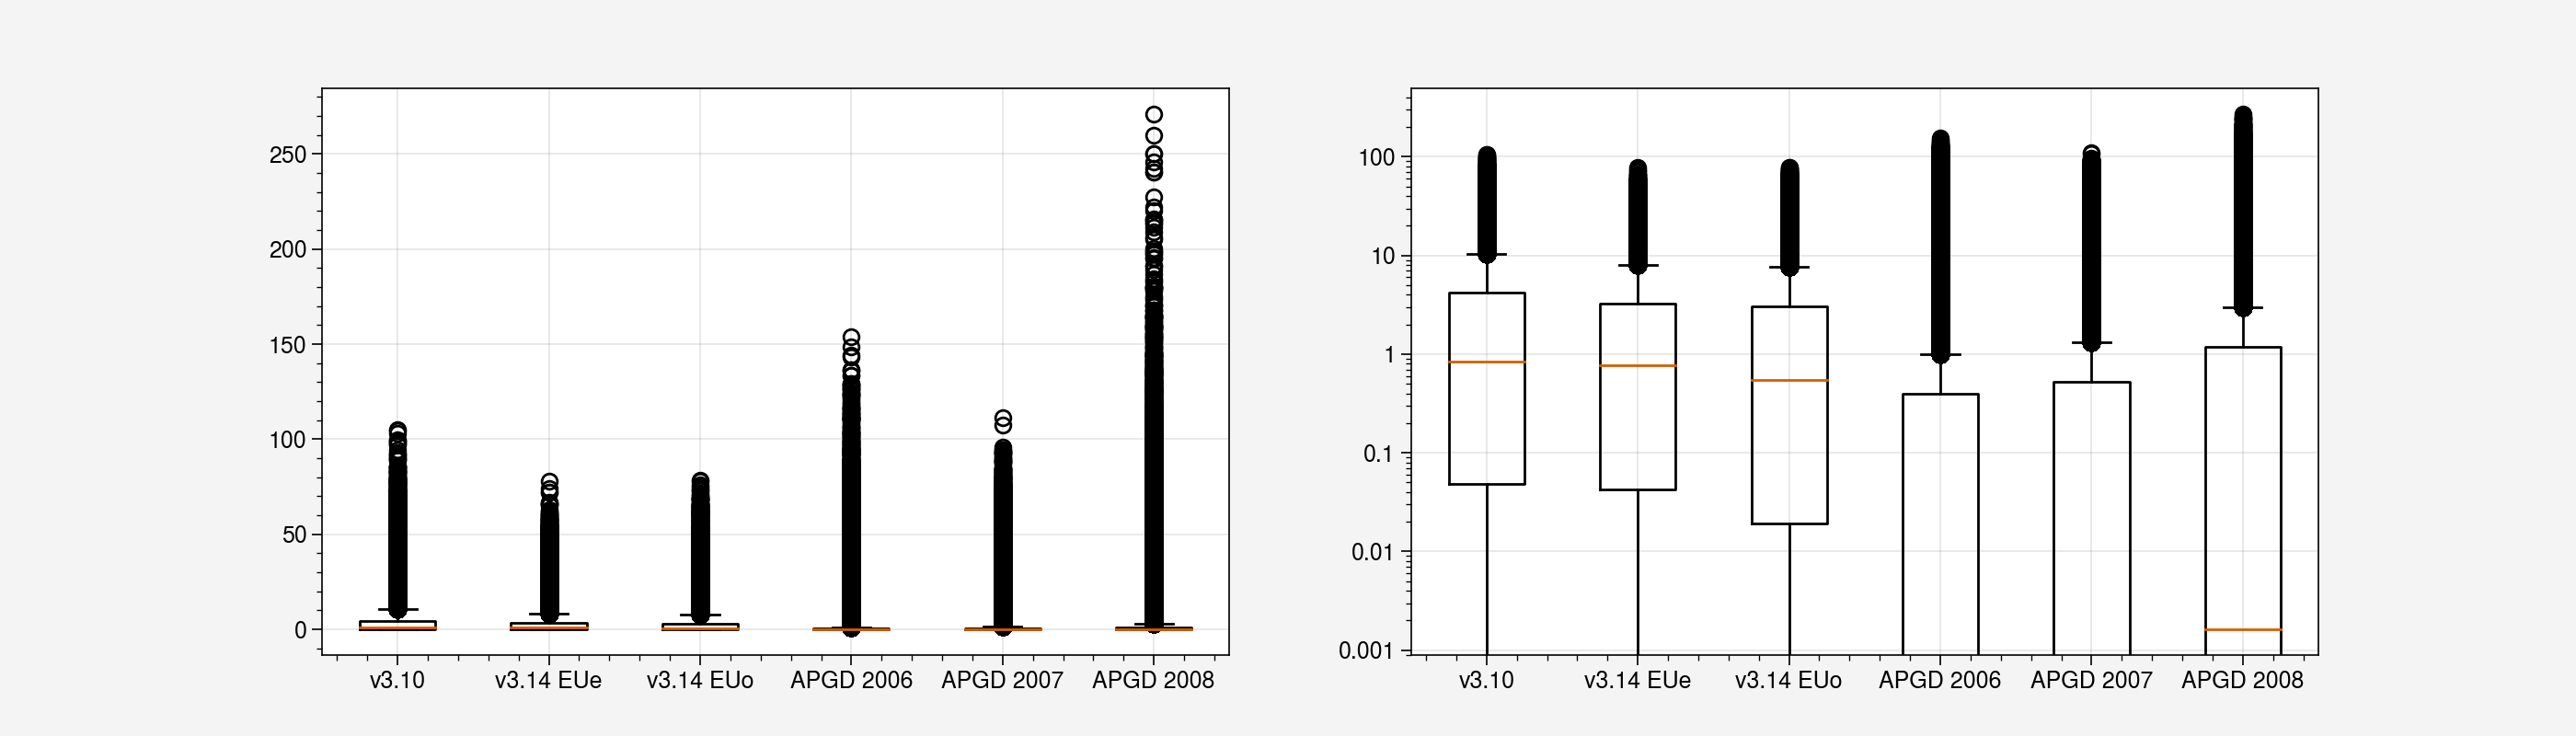

In [106]:
f,axs = plt.subplots(ncols=2)

vals2006 = ds_APGD2006.values
vals2006 = vals2006[~np.isnan(vals2006)]

vals2007 = ds_APGD2007.values
vals2007 = vals2007[~np.isnan(vals2007)]

vals2008 = ds_APGD2008.values
vals2008 = vals2008[~np.isnan(vals2008)]

axs[0].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
                ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),vals2006.ravel(),vals2007.ravel(),
                vals2008.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','APGD 2006','APGD 2007','APGD 2008'])

axs[1].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
                ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),vals2006.ravel(),vals2007.ravel(),
                vals2008.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','APGD 2006','APGD 2007','APGD 2008'])
axs[1].set_yscale('log')
f.set_figwidth(14)

In [78]:
ds_310 = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.CC.2014.nc').sel(time=slice('2014-10-01','2014-10-31')).CC

ds_314EUe = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.10.01-31.nc').CC

ds_314EUo = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.10.01-31.nc').CC

In [79]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

{'whiskers': [<matplotlib.lines.Line2D at 0x14ff3c94fc40>,
 'caps': [<matplotlib.lines.Line2D at 0x14ff3c94c670>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ff3c94d0c0>,
 'medians': [<matplotlib.lines.Line2D at 0x14ff3c94c520>,
 'fliers': [<matplotlib.lines.Line2D at 0x14ff3c94e8c0>,
 'means': []}

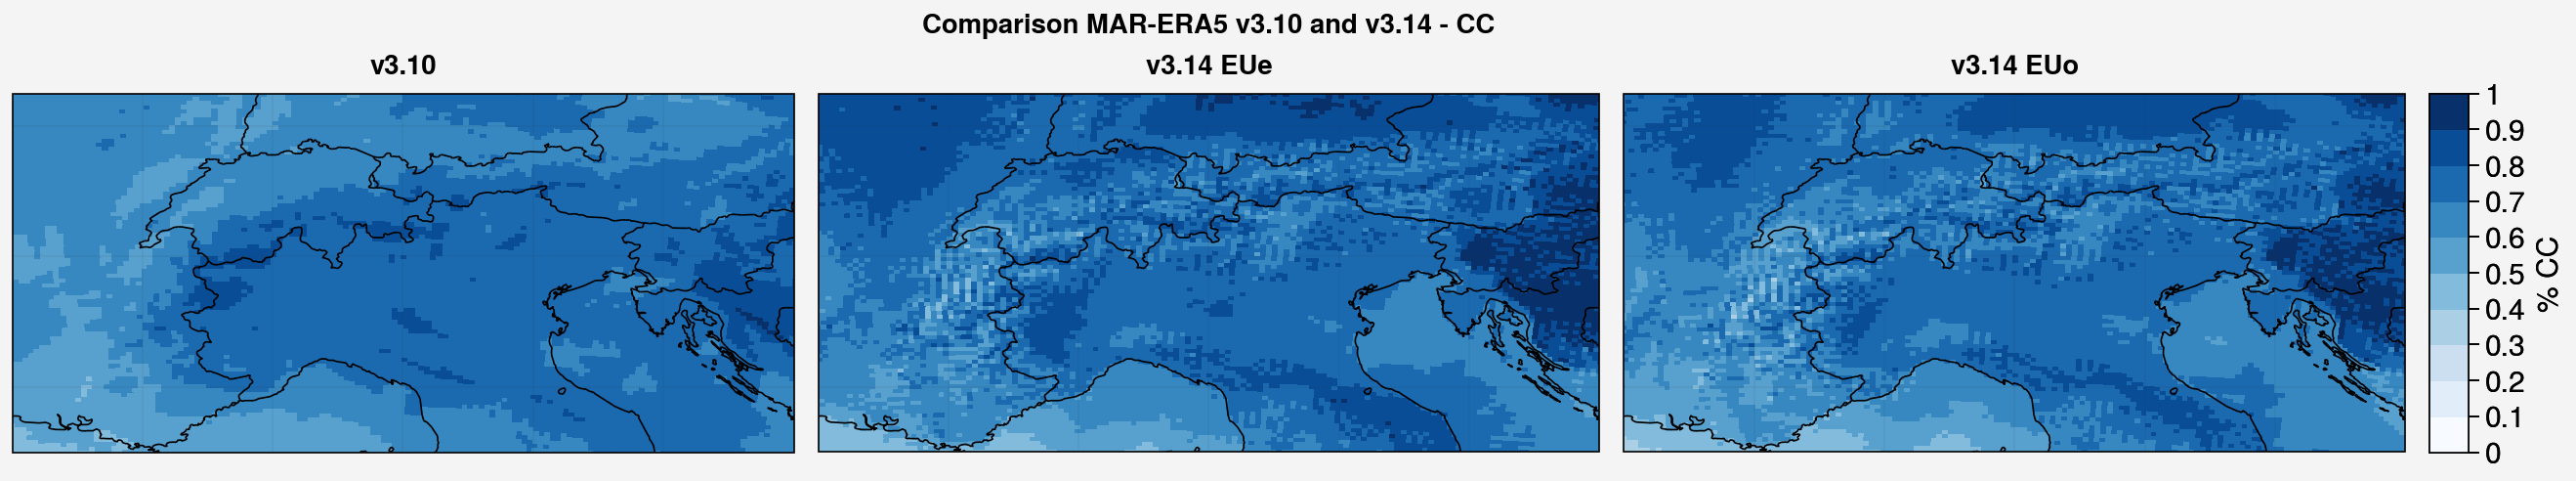

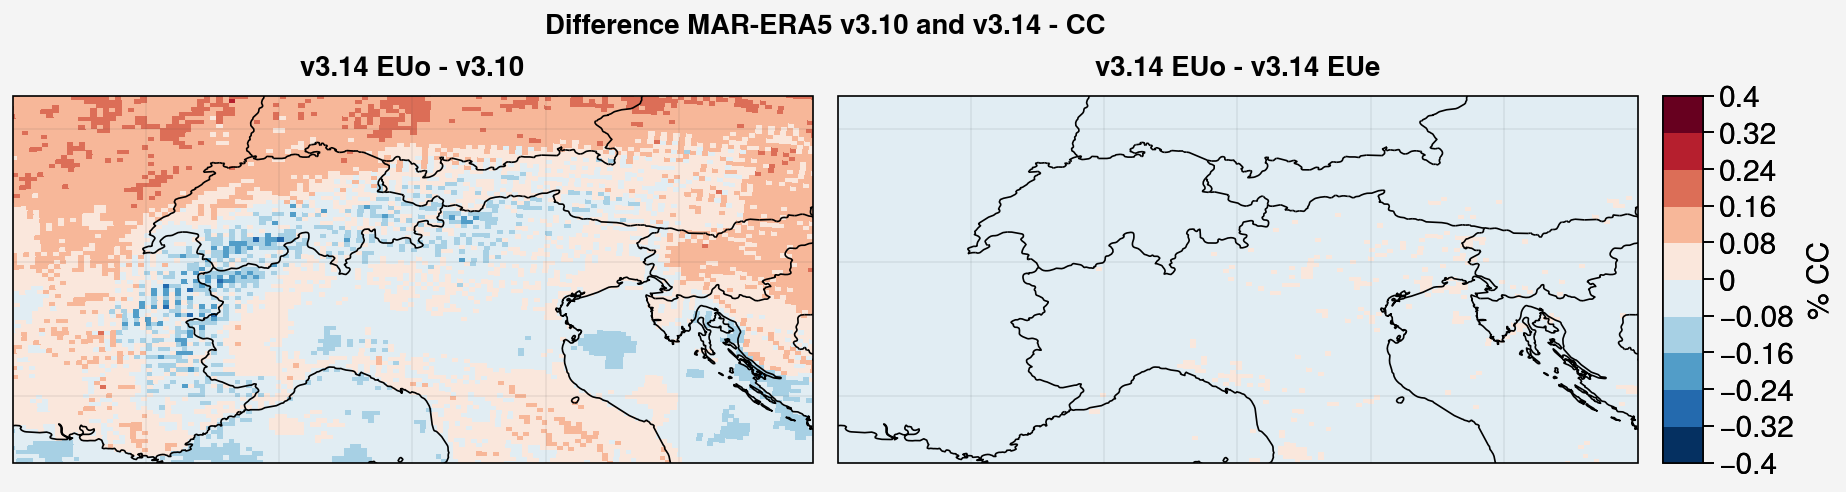

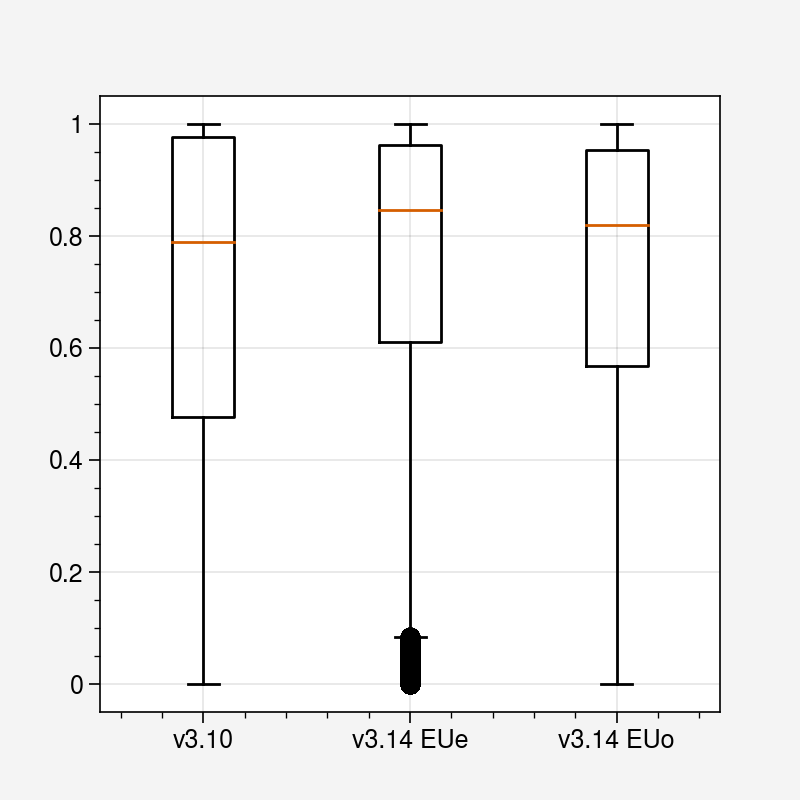

In [80]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'Blues'
lvls = np.linspace(0,1,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '% CC',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - CC',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-0.4,0.4,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '% CC',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - CC',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots()

ds_314EUe_daily = ds_314EUe.groupby("time.day").mean(dim="time")

axs.boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

#### December 2014

In [70]:
ds_310 = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.TTz.2014.nc').sel(ztqlev=2.0,time=slice('2014-12-01','2014-12-31')).TTz

ds_314EUe = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.12.01-31.nc').TTz.sel(ztqlev=2.0)

ds_314EUo = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.12.01-31.nc').TTz.sel(ztqlev=2.0)

In [71]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

{'whiskers': [<matplotlib.lines.Line2D at 0x14ff3f61cc70>,
 'caps': [<matplotlib.lines.Line2D at 0x14ff3f61c7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ff40629f00>,
 'medians': [<matplotlib.lines.Line2D at 0x14ff3f61c280>,
 'fliers': [<matplotlib.lines.Line2D at 0x14ff3f61e7a0>,
 'means': []}

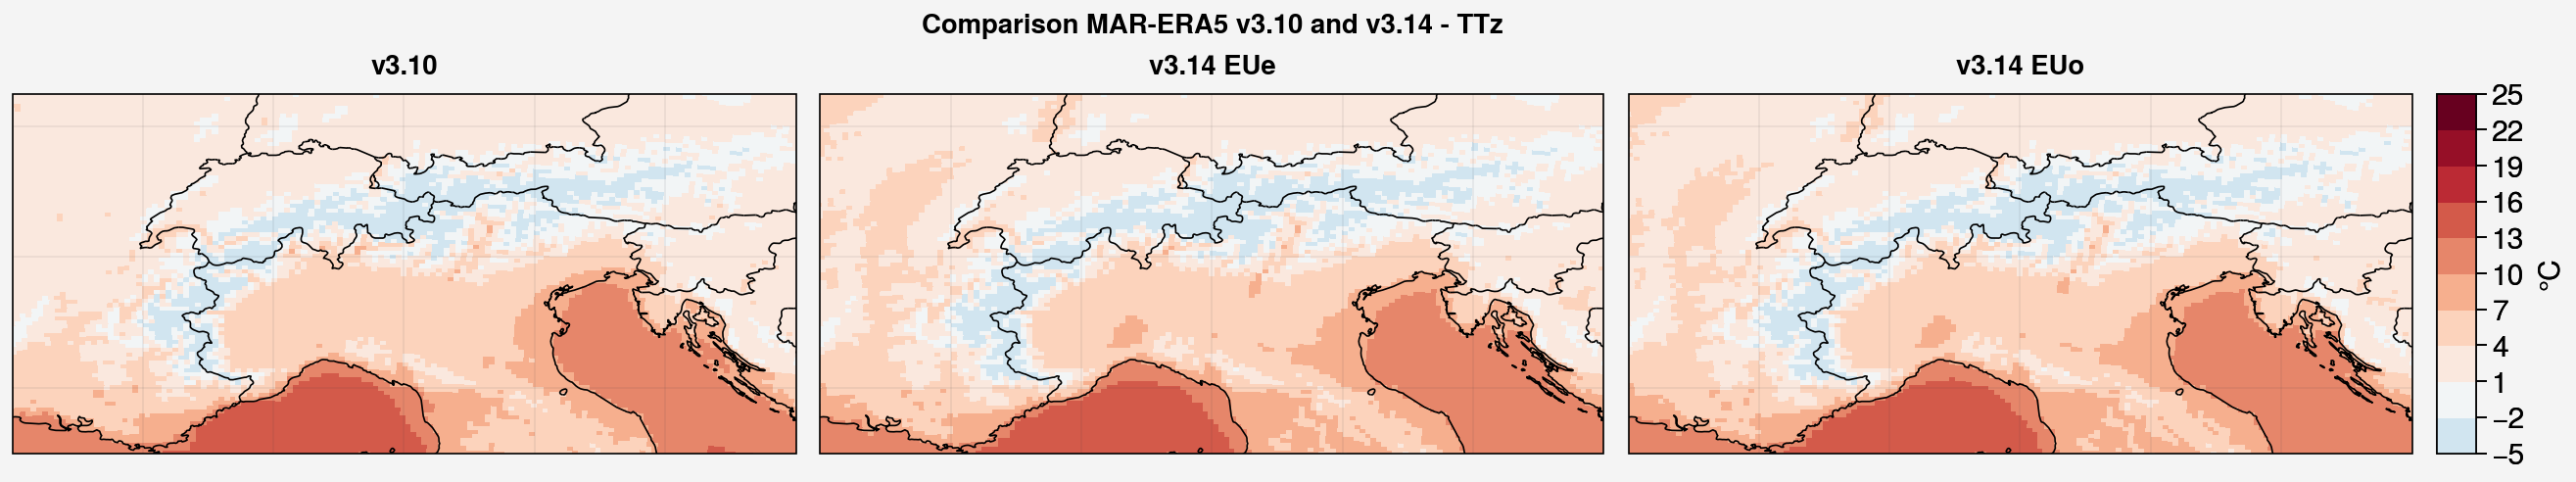

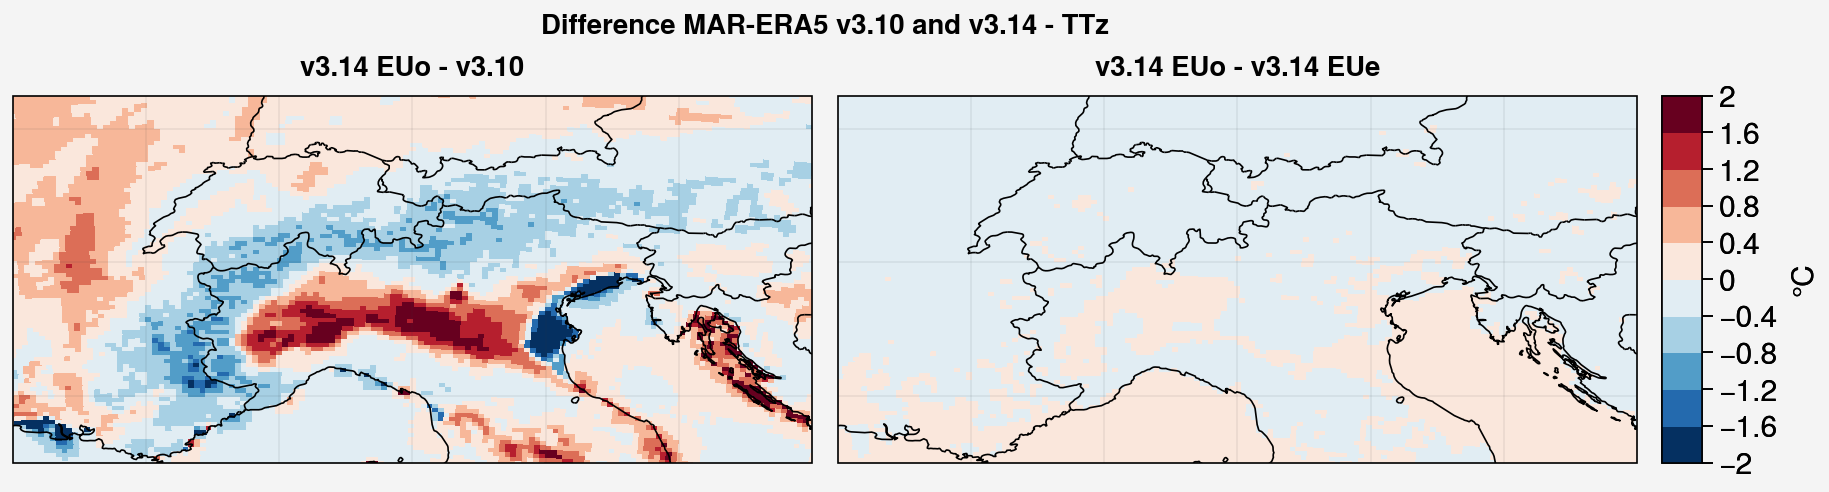

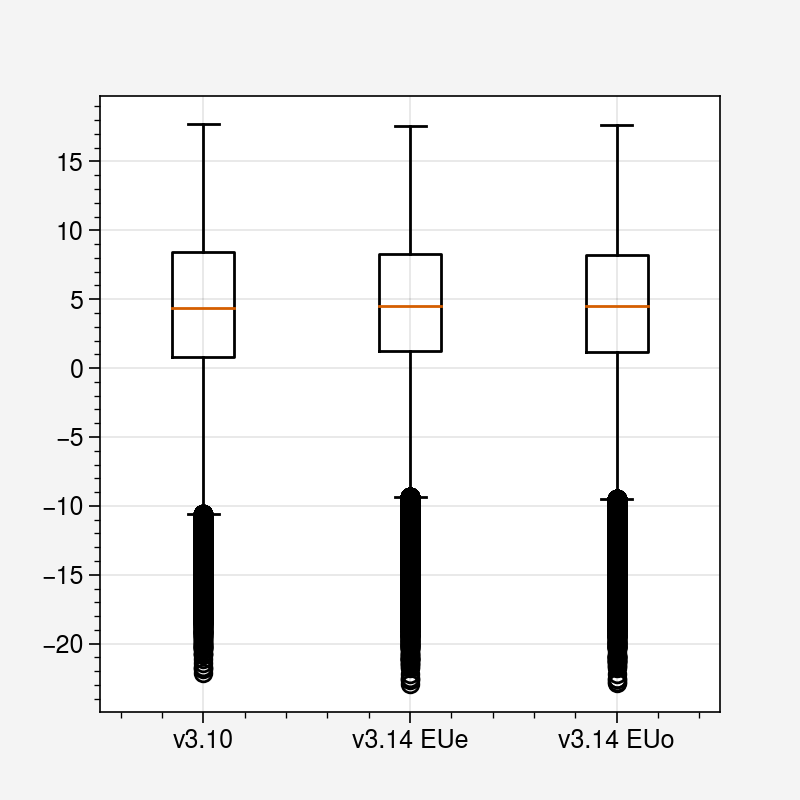

In [72]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-5,25,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'RdBu_r'
lvls = np.linspace(-2,2,11)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe.mean(dim='time'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= '°C',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - TTz',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots()

ds_314EUe_daily = ds_314EUe.groupby("time.day").mean(dim="time")

axs.boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

In [81]:
ds_310_MBrr = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBrr.2014.nc').sel(time=slice('2014-12-01','2014-12-31')).MBrr
ds_310_MBsf = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBsf.2014.nc').sel(time=slice('2014-12-01','2014-12-31')).MBsf

ds_310 = ds_310_MBrr + ds_310_MBsf

In [82]:
ds_314EUe_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.12.01-31.nc').MBrr
ds_314EUe_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUe/e01/2014/ICE.e01.2014.12.01-31.nc').MBsf

ds_314EUe = ds_314EUe_MBrr + ds_314EUe_MBsf

In [83]:
ds_314EUo_MBrr = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.12.01-31.nc').MBrr
ds_314EUo_MBsf = xr.open_dataset('/bettik/castelli/MARout/EUo/o01/2014/ICE.o01.2014.12.01-31.nc').MBsf

ds_314EUo = ds_314EUo_MBrr + ds_314EUo_MBsf

In [84]:
ds_310 = ds_310.assign_coords(x=ds_314EUo.x)
ds_310 = ds_310.assign_coords(y=ds_314EUo.y)

/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/castelli/.conda/envs/phd_v3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAx

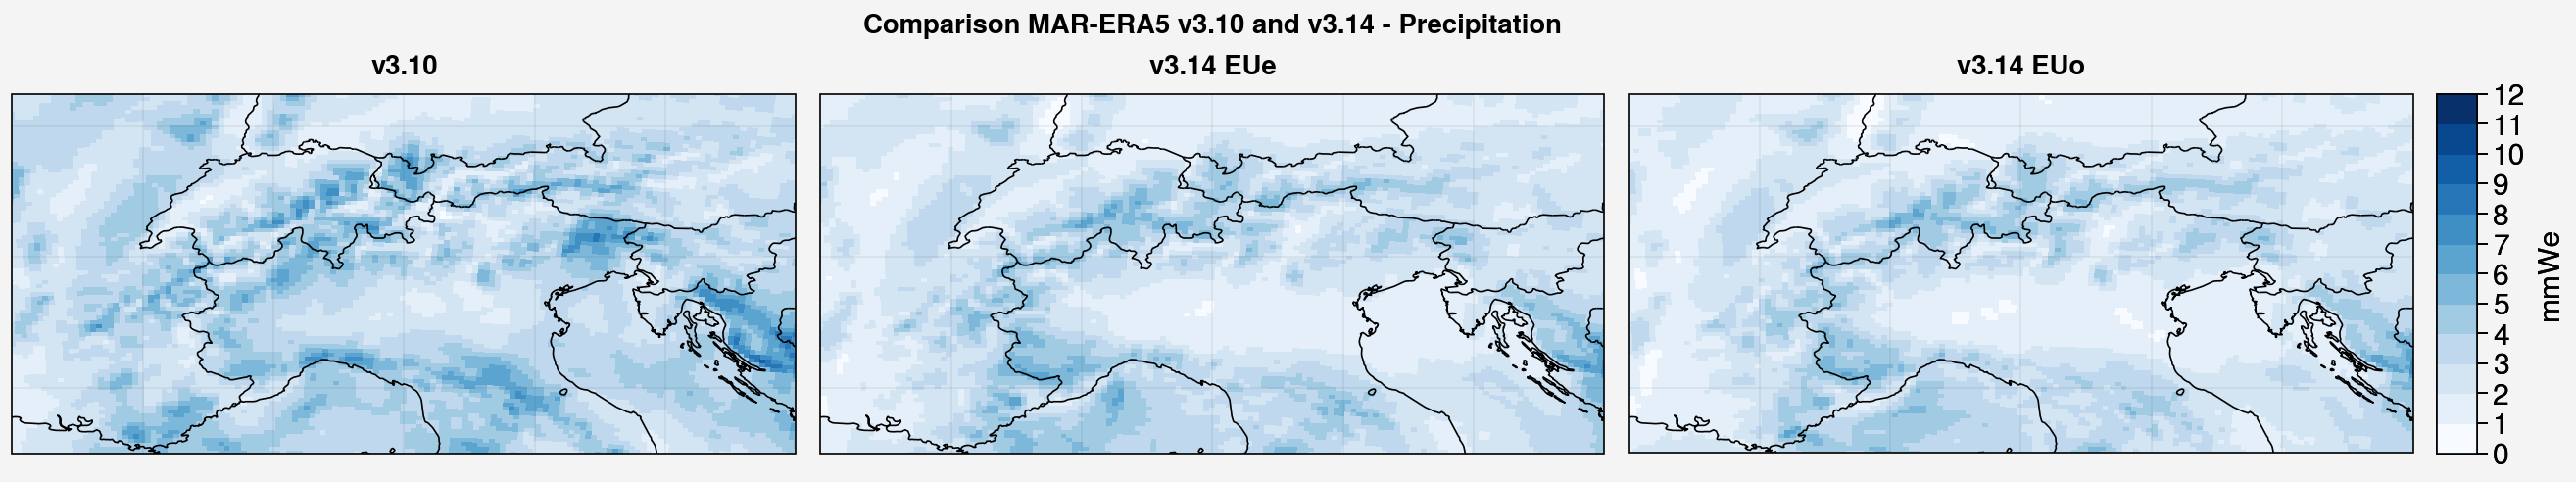

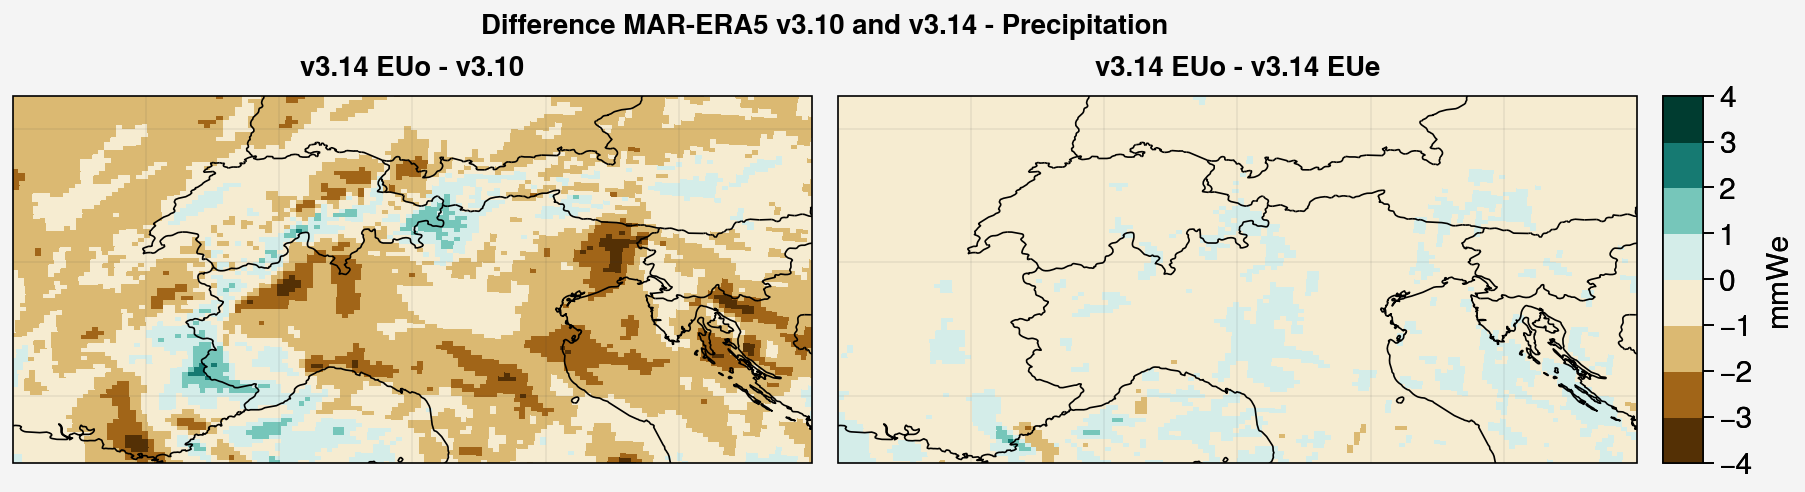

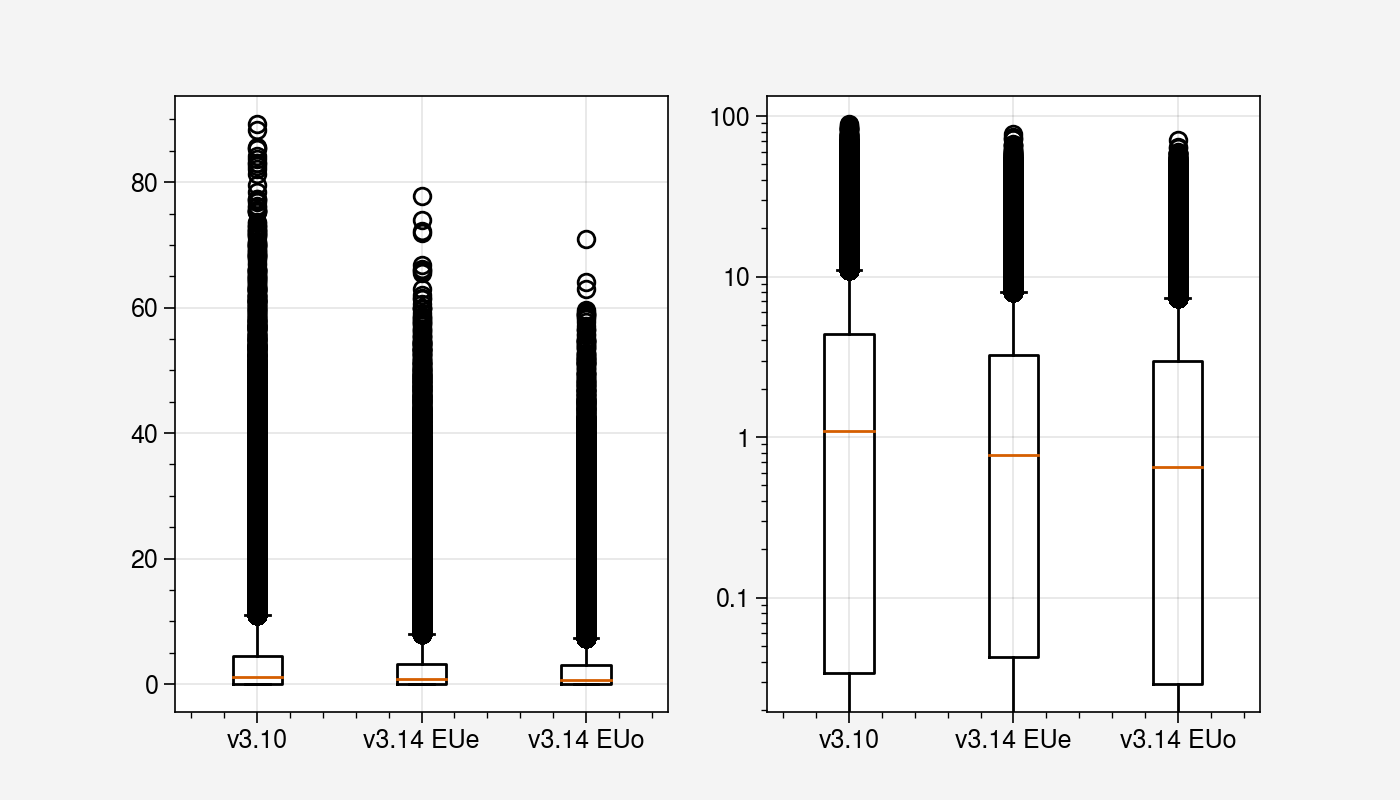

In [85]:
f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=3,nrows=1)

ds_314EUe_daily = ds_314EUe.groupby("time.day").sum(dim="time")

colmap = 'Blues'
lvls = np.linspace(0,12,13)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Comparison MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.10','v3.14 EUe','v3.14 EUo'])

# __________________________________

f, axs = pplt.subplots(proj='cyl', axwidth=4,ncols=2,nrows=1)

colmap = 'BrBG'
lvls = np.linspace(-4,4,9)

axs[0].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_310.mean(dim='time'),levels=lvls,cmap=colmap)

m=axs[1].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time') - ds_314EUe_daily.mean(dim='day'),levels=lvls,cmap=colmap)

#m=axs[2].pcolormesh(ds.LON,ds.LAT,ds_314EUo.mean(dim='time'),levels=lvls,cmap=colmap)

f.colorbar(m,label= 'mmWe',labelsize='large',ticklabelsize='large')
axs.format(**multiplot_format,suptitle='Difference MAR-ERA5 v3.10 and v3.14 - Precipitation',collabels=['v3.14 EUo - v3.10','v3.14 EUo - v3.14 EUe'])

# __________________________________
f,axs = plt.subplots(ncols=2)


axs[0].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])

axs[1].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
           ds_314EUo[:,jmin:jmax,imin:imax].values.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo'])
axs[1].set_yscale('log')
f.set_figwidth(7)

In [92]:
ds_APGD2006 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2006.nc').sel(time=slice('2006-12-01','2006-12-31')).PRECIPITATION
ds_APGD2007 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2007.nc').sel(time=slice('2007-12-01','2007-12-31')).PRECIPITATION
ds_APGD2008 = xr.open_dataset('/bettik/castelli/data/EURO4M_APGD/APGD_2008.nc').sel(time=slice('2008-12-01','2008-12-31')).PRECIPITATION

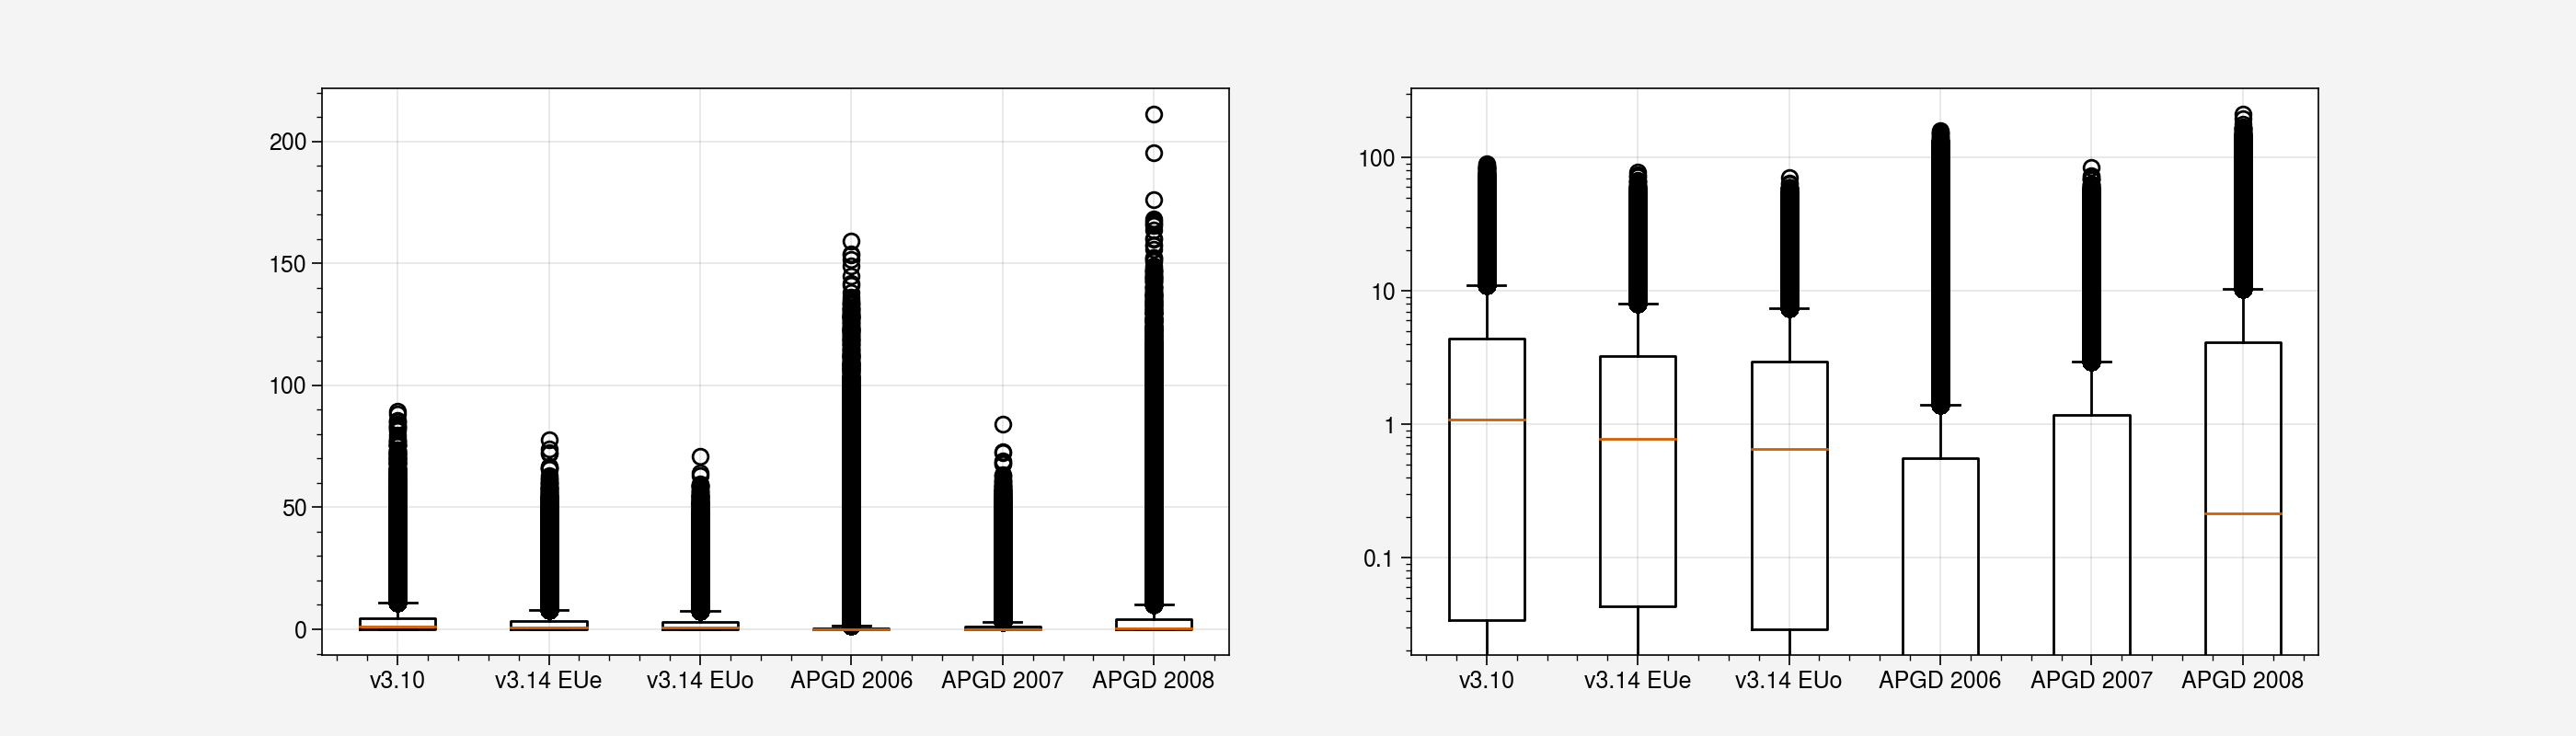

In [100]:
f,axs = plt.subplots(ncols=2)

vals2006 = ds_APGD2006.values
vals2006 = vals2006[~np.isnan(vals2006)]

vals2007 = ds_APGD2007.values
vals2007 = vals2007[~np.isnan(vals2007)]

vals2008 = ds_APGD2008.values
vals2008 = vals2008[~np.isnan(vals2008)]

axs[0].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
                ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),vals2006.ravel(),vals2007.ravel(),
                vals2008.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','APGD 2006','APGD 2007','APGD 2008'])

axs[1].boxplot([ds_310[:,jmin:jmax,imin:imax].values.ravel(), ds_314EUe_daily[:,jmin:jmax,imin:imax].values.ravel(),
                ds_314EUo[:,jmin:jmax,imin:imax].values.ravel(),vals2006.ravel(),vals2007.ravel(),
                vals2008.ravel()],labels=['v3.10','v3.14 EUe','v3.14 EUo','APGD 2006','APGD 2007','APGD 2008'])
axs[1].set_yscale('log')
f.set_figwidth(14)